In [11]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [12]:
df =pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


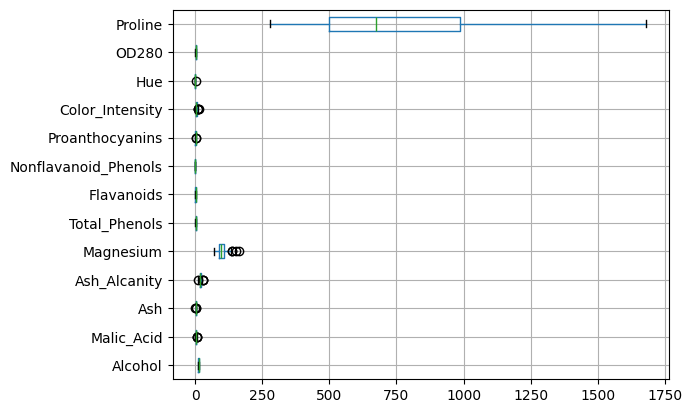

In [14]:
df.select_dtypes(include="number").boxplot(vert=False)
plt.show()

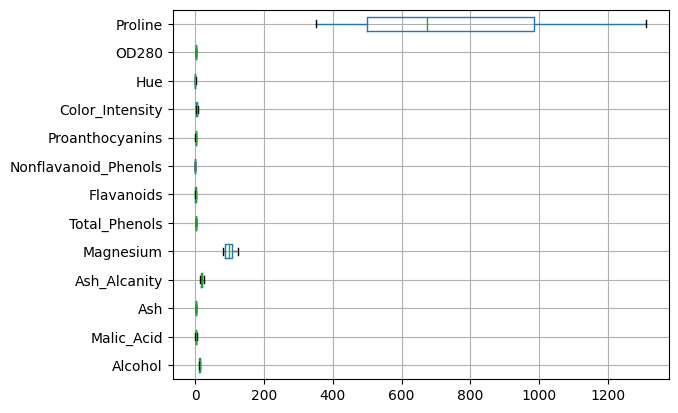

In [15]:
from scipy.stats.mstats import winsorize

for i in df.columns:
    df[i] =winsorize(df[i],limits=[0.05,0.05])
df.select_dtypes(include="number").boxplot(vert=False)
plt.show()

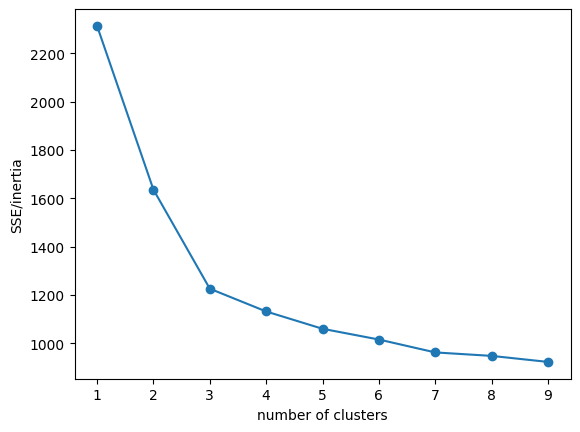

In [33]:
from sklearn.cluster import KMeans
sse =[]
k_rng =range(1,10)
for k in k_rng:
    km =KMeans(n_clusters=k,random_state=42)
    km.fit_predict(df)
    sse.append(km.inertia_)

plt.Figure(figsize=(10,10))
plt.xlabel("number of clusters")
plt.ylabel('SSE/inertia')
plt.plot(k_rng,sse,marker='o')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled =scale.fit_transform(df)

df=pd.DataFrame(scaled,columns=df.columns)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.590019,-0.579877,0.270529,-1.342973,2.142342,0.856642,1.086259,-0.688391,1.332393,0.289250,0.399573,1.413197,1.102331
1,0.260786,-0.512727,-0.967479,-1.687275,0.058972,0.603490,0.774079,-0.856015,-0.584368,-0.293146,0.445836,1.151258,1.051371
2,0.209165,0.043652,1.295088,-0.310066,0.139101,0.856642,1.273568,-0.520766,2.224351,0.307739,0.353311,0.816558,1.510008
3,1.590019,-0.349651,0.569359,-0.929810,1.100657,1.700485,1.533718,-1.023640,1.123637,1.287643,-0.433153,1.224019,1.934671
4,0.312407,0.264286,1.636607,0.516260,1.501305,0.856642,0.701237,0.233544,0.440435,-0.320879,0.399573,0.467305,-0.018781


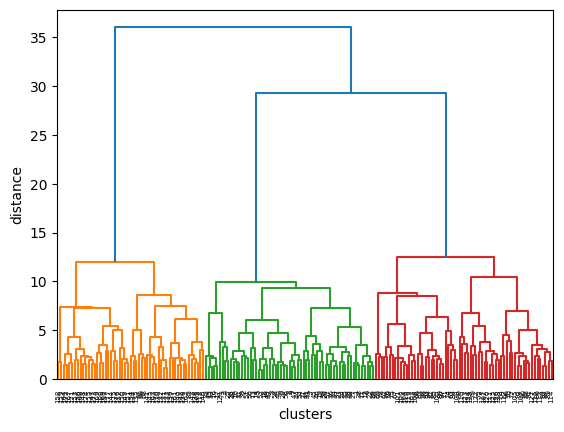

In [22]:
from scipy.cluster.hierarchy import dendrogram,linkage

z= linkage(df,method='ward')
plt.Figure(figsize=(15,15))
dendrogram(z)
plt.xlabel("clusters")
plt.ylabel("distance")
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3,linkage="ward",metric="euclidean")

y_predict =model.fit_predict(df)


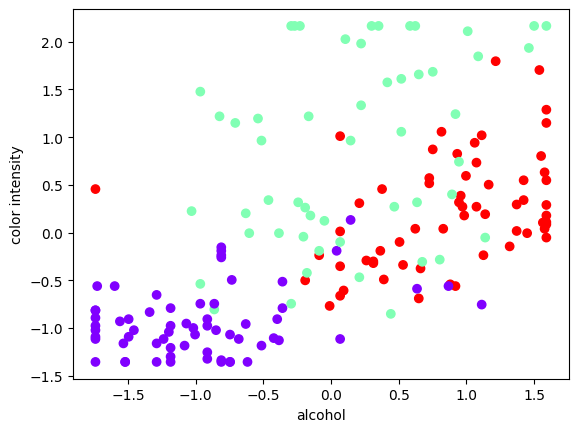

In [31]:
plt.scatter(df['Alcohol'],df['Color_Intensity'] , c=y_predict, cmap='rainbow')
plt.xlabel("alcohol")
plt.ylabel('color intensity')
plt.show()
